In [1]:


from DiffusionProject.Algorithms.Walks import QuantumWalk2D, QuantumWalk1D
from DiffusionProject.Backends.backend import Backend
from DiffusionProject.Algorithms.Boundaries import BoundaryControl, Boundary, OneWayBoundaryControl
from DiffusionProject.Algorithms.Coins import HadamardCoin, GroverCoin
from qiskit.test.mock import FakeToronto
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer
from qiskit.compiler import transpile, assemble
from qiskit import IBMQ
from matplotlib import pyplot as plt


In [ ]:
from DiffusionProject.Algorithms.Walks import QuantumWalk2D
from DiffusionProject.Backends.backend import Backend
from DiffusionProject.Algorithms.Boundaries import BoundaryControl, Boundary
from DiffusionProject.Algorithms



BACKEND = Backend()

Nqubits = 3
boundary_right_edge = Boundary("111",dimension = 0)
boundary_left_edge = Boundary("000",dimension = 0)
boundary_top_edge = Boundary("111", dimension = 1)
boundary_bottom_edge = Boundary("000",dimension = 1)

boundaries = [boundary_right_edge, boundary_bottom_edge, boundary_left_edge, boundary_right_edge]

solid_boundary_control = BoundaryControl()
solid_boundary_control.add_boundaries(boundaries=boundaries)

walk2D = QuantumWalk2D(BACKEND, [Nqubits,Nqubits],["011","011"],)





running on device: CPU
Backend: aer_simulator(fake_toronto)


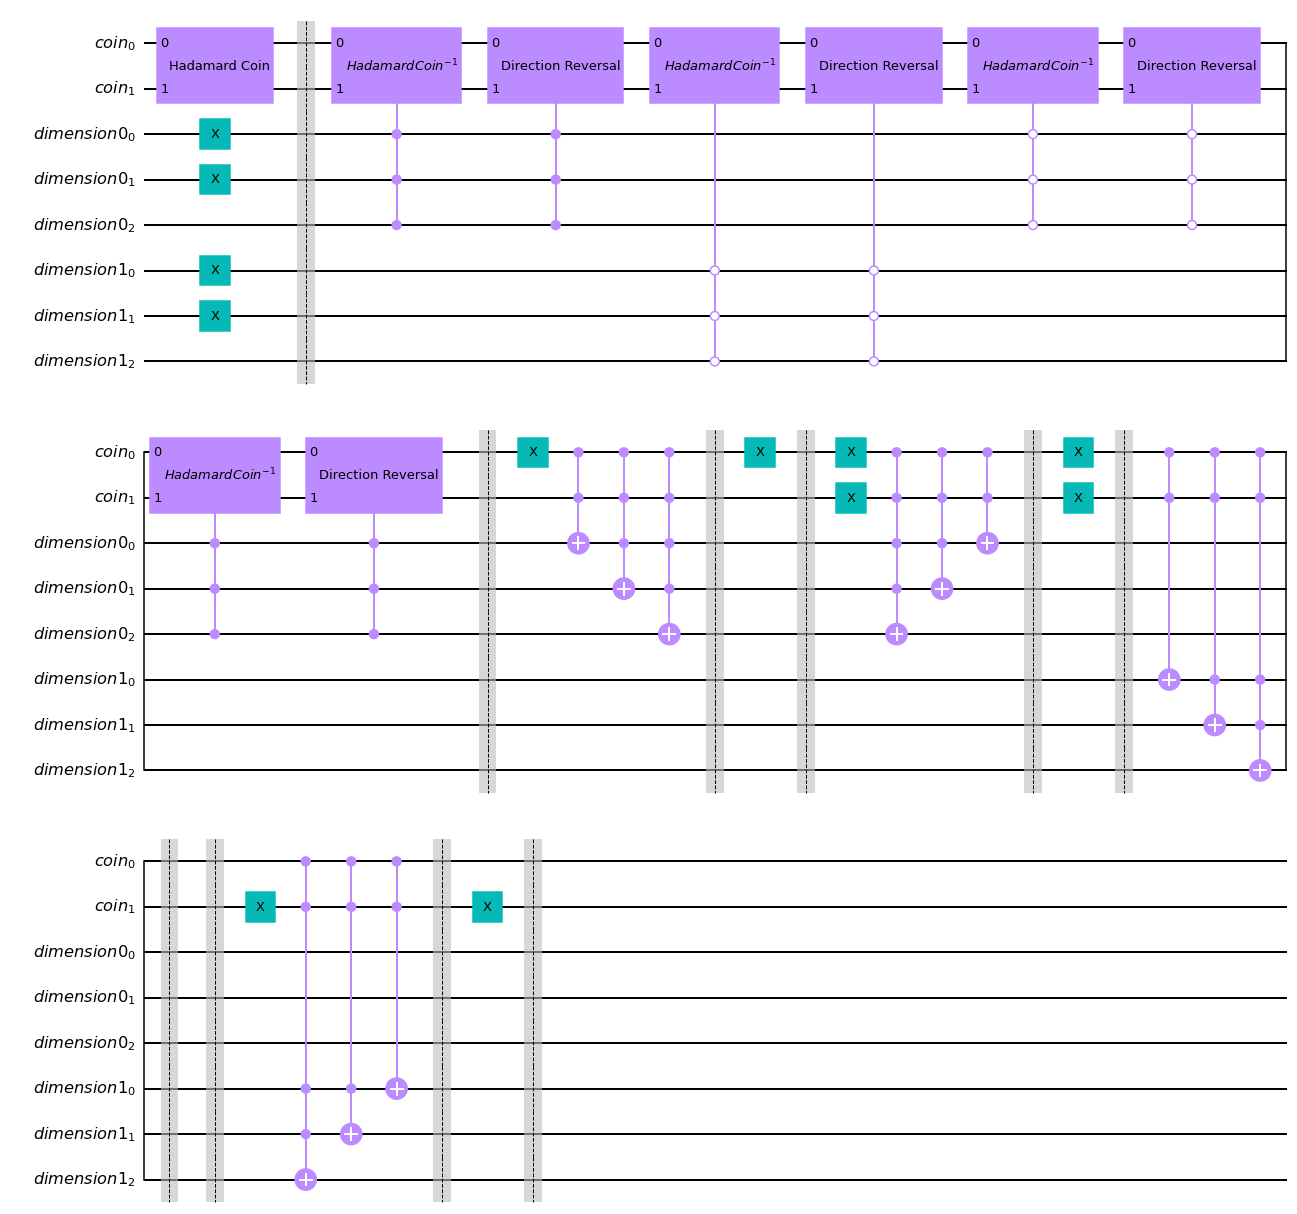

In [2]:
BACKEND = Backend(backend=FakeToronto())




boundary_right_edge = Boundary("111",0)
boundary_left_edge = Boundary("000",0)
boundary_top_edge = Boundary("111",1)
boundary_bottom_edge = Boundary("000",1)
boundaries = [boundary_right_edge, boundary_bottom_edge, boundary_left_edge, boundary_right_edge]
hard_control = BoundaryControl()
hard_control.add_boundaries(boundaries)
walk = QuantumWalk2D(BACKEND,[3,3],initial_states=["011","011"],coin_class=HadamardCoin, boundary_controls=[hard_control])
walk.step()
walk.quantum_circuit.draw('mpl')


# walk.draw_circuit("/Volumes/Extreme SSD/AEROY4/Simulation-of-a-Quantum-Computer/qiskit-env/Experiment_3_dims_3_qubits_Grover_coin/images/img.png")


running on device: CPU
Backend: aer_simulator(fake_toronto)


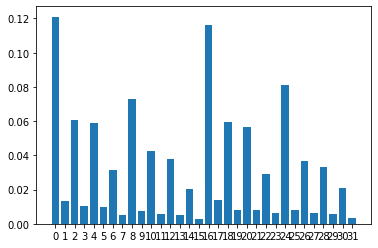

In [14]:
BACKEND = Backend(backend=FakeToronto())




boundary_right_edge = Boundary("11111",0)
boundary_left_edge = Boundary("00000",0)
# boundary_top_edge = Boundary("1111",1)
# boundary_bottom_edge = Boundary("0000",1)
boundaries = [boundary_right_edge, boundary_left_edge]
hard_control = BoundaryControl()
hard_control.add_boundaries(boundaries)
walk = QuantumWalk1D(BACKEND,5,initial_states="01111",coin_class=HadamardCoin, boundary_controls=[hard_control])

job = walk.run_experiment(n_steps = 10, shots=10048)
results = walk.get_results(job)
x,probability_density = results["dimension_0"],results["probability_density"]
axes_limit = (2**5)-1

plt.bar(x,probability_density)
plt.xticks([i for i in range(axes_limit+1)])
plt.show()
# x,y,probability_density = results["dimension_0"],results["dimension_1"],results["probability_density"]
# axes_limit = (2**4)-1

# alpha = [i**(1/4) for i in probability_density]

# plt.scatter(x,y,alpha=alpha,linewidths=[20*i**0.5 for i in probability_density], s = [400*i**0.5 for i in probability_density])
# plt.xlim(0,axes_limit)
# plt.ylim(0,axes_limit)
# plt.xlabel('X')
# plt.ylabel('Y')

In [38]:
BACKEND = Backend()




boundary_right_edge = Boundary("11111",0)
boundary_left_edge = Boundary("00000",0)
# boundary_top_edge = Boundary("1111",1)
# boundary_bottom_edge = Boundary("0000",1)
boundaries = [boundary_right_edge, boundary_left_edge]
hard_control = BoundaryControl()
hard_control.add_boundaries(boundaries)
walk = QuantumWalk1D(BACKEND,5,initial_states="01111",coin_class=HadamardCoin, boundary_controls=[hard_control])

job = walk.run_experiment(n_steps = 10, shots=4048)

results = job.result()
counts = results.get_counts()
counts = walk.discard_non_state_bits(counts, False)



# results = walk.get_results(job)
# x,probability_density = results["dimension_0"],results["probability_density"]
# axes_limit = (2**5)-1

# plt.bar(x,probability_density)
# plt.xticks([i for i in range(axes_limit+1)])
# plt.show()

running on device: CPU
Backend: aer_simulator


In [ ]:


total = 0 
for key, value in counts.items():
    total+=value

assert total == 4048

counts

In [2]:

def merge_counts(total_counts, counts_appendage):
    print(f"total counts currently {total_counts}")
    print(f"appending {counts_appendage}")
    for bitstring, n_shots in counts_appendage.items():
        if total_counts.get(bitstring) is None:
            total_counts[bitstring] = 0
        total_counts[bitstring]+=n_shots

In [5]:

BACKEND = Backend()




boundary_right_edge = Boundary("11111",0)
boundary_left_edge = Boundary("00000",0)
# boundary_top_edge = Boundary("1111",1)
# boundary_bottom_edge = Boundary("0000",1)
boundaries = [boundary_right_edge, boundary_left_edge]
hard_control = BoundaryControl()
hard_control.add_boundaries(boundaries)
walk = QuantumWalk1D(BACKEND,5,initial_states="01111",coin_class=HadamardCoin, boundary_controls=[hard_control])
state_register_indices, _ = walk.get_state_register_indices()


decoherence_intervals = 6
steps = 20


n_full_cycles = steps//decoherence_intervals
remainder_steps = steps%decoherence_intervals

counts = walk.run_experiment(0,1024).result().get_counts()
counts = walk.discard_non_state_bits(counts, False)



for cycle in range(n_full_cycles):
    total_counts = {}
    print(f"decohenerence cycle {cycle+1}")
    for bitstring, n_shots in counts.items():
        initial_states = []
        for dimension_params in state_register_indices:
                initial_states.append(bitstring[dimension_params['start_idx']:1+dimension_params['end_idx']])
        print(f"Running a Quantum Walk Starting at {initial_states} for {n_shots} shots")
        job = walk.run_experiment(n_steps = decoherence_intervals, shots=n_shots, initial_states=initial_states)
        results = job.result()
        counts_appendage = results.get_counts()
        counts_appendage = walk.discard_non_state_bits(counts_appendage, False)
        merge_counts(total_counts=total_counts,counts_appendage=counts_appendage)

    counts = total_counts

if remainder_steps:
    print(f"decohenerence cycle {n_full_cycles+1}")
    total_counts = {}
    for bitstring, n_shots in counts.items():
        initial_states = []
        for dimension_params in state_register_indices:
                initial_states.append(bitstring[dimension_params['start_idx']:1+dimension_params['end_idx']])
        print(f"Running a Quantum Walk Starting at {initial_states} for {n_shots} shots")
        job = walk.run_experiment(n_steps = remainder_steps, shots=n_shots, initial_states=initial_states)
        results = job.result()
        counts_appendage = results.get_counts()
        counts_appendage = walk.discard_non_state_bits(counts_appendage, False)
        merge_counts(total_counts=total_counts,counts_appendage=counts_appendage)

    counts = total_counts






running on device: CPU
Backend: aer_simulator
Running a Quantum Walk Starting at ['01111'] for 1024 shots


/Volumes/Extreme SSD/AEROY4/Simulation-of-a-Quantum-Computer/qiskit-env/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


total counts currently {}
appending {'10011': 420, '01101': 81, '01111': 117, '01001': 12, '10001': 217, '01011': 167, '10101': 10}
Running a Quantum Walk Starting at ['10011'] for 420 shots
total counts currently {}
appending {'01101': 8, '01111': 70, '10101': 79, '10111': 172, '10001': 37, '10011': 47, '11001': 7}
Running a Quantum Walk Starting at ['01101'] for 81 shots
total counts currently {'01101': 8, '01111': 70, '10101': 79, '10111': 172, '10001': 37, '10011': 47, '11001': 7}
appending {'01011': 3, '10011': 1, '01111': 23, '01101': 14, '01001': 10, '10001': 30}
Running a Quantum Walk Starting at ['01111'] for 117 shots
total counts currently {'01101': 22, '01111': 93, '10101': 79, '10111': 172, '10001': 67, '10011': 48, '11001': 7, '01011': 3, '01001': 10}
appending {'01011': 18, '01111': 13, '01001': 1, '10001': 20, '01101': 7, '10101': 3, '10011': 55}
Running a Quantum Walk Starting at ['01001'] for 12 shots
total counts currently {'01101': 29, '01111': 106, '10101': 82, '10

In [24]:
results.results[0].shots
counts_appendage

{'10100': 132,
 '01010': 134,
 '01110': 500,
 '01100': 613,
 '10010': 2155,
 '10000': 514}

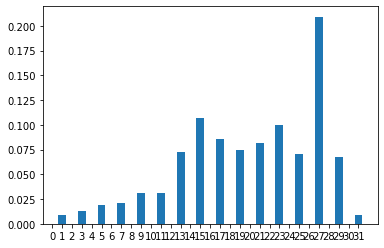

In [43]:
state_register_indices, _ = walk.get_state_register_indices()
displacement_tensors = {}
for idx in range(walk.n_system_dimensions):
    displacement_tensors["dimension_{}".format(idx)] = []
        
displacement_tensors["probability_density"] = []
for key, value in counts.items():
    for dimension_params in state_register_indices:
        dimensional_displacement = int(key[dimension_params['start_idx']:1+dimension_params['end_idx']], 2)
        displacement_tensors["dimension_{}".format(dimension_params["dimension"])].append(dimensional_displacement)

    displacement_tensors["probability_density"].append(1.0*value/4048)

results = displacement_tensors
x,probability_density = results["dimension_0"],results["probability_density"]
axes_limit = (2**5)-1

plt.bar(x,probability_density)
plt.xticks([i for i in range(axes_limit+1)])
plt.show()

running on device: CPU
Backend: aer_simulator


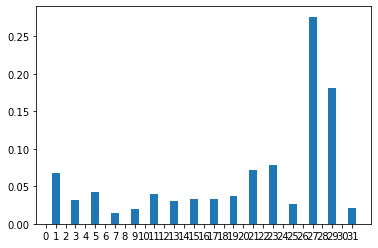

In [37]:
BACKEND = Backend()




boundary_right_edge = Boundary("11111",0)
boundary_left_edge = Boundary("00000",0)
# boundary_top_edge = Boundary("1111",1)
# boundary_bottom_edge = Boundary("0000",1)
boundaries = [boundary_right_edge, boundary_left_edge]
hard_control = BoundaryControl()
hard_control.add_boundaries(boundaries)
walk = QuantumWalk1D(BACKEND,5,initial_states="01111",coin_class=HadamardCoin, boundary_controls=[hard_control])

job = walk.run_experiment(n_steps = 20, shots=4048)

results = job.result()
counts = results.get_counts()
counts = walk.discard_non_state_bits(counts, False)



results = walk.get_results(job)
x,probability_density = results["dimension_0"],results["probability_density"]
axes_limit = (2**5)-1

plt.bar(x,probability_density)
plt.xticks([i for i in range(axes_limit+1)])
plt.show()

running on device: CPU
Backend: aer_simulator


Text(0, 0.5, 'Y')

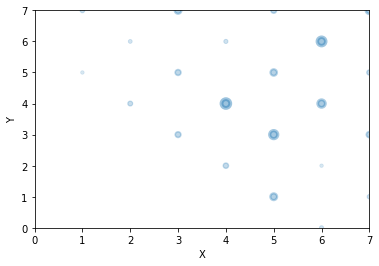

In [ ]:
BACKEND = Backend()





boundary_right_edge = Boundary("1111",0)
boundary_left_edge = Boundary("0000",0)
boundary_top_edge = Boundary("1111",1)
boundary_bottom_edge = Boundary("0000",1)
boundaries = [boundary_right_edge, boundary_bottom_edge, boundary_left_edge, boundary_right_edge]
hard_control = BoundaryControl()
hard_control.add_boundaries(boundaries)
walk = QuantumWalk2D(BACKEND,[4,4],initial_states=["0111","0111"],coin_class=GroverCoin, boundary_controls=[hard_control])

job = walk.run_experiment(n_steps = 10, shots=2048)
results = walk.get_results(job)
x,y,probability_density = results["dimension_0"],results["dimension_1"],results["probability_density"]
axes_limit = (2**4)-1

alpha = [i**(1/4) for i in probability_density]

plt.scatter(x,y,alpha=alpha,linewidths=[20*i**0.5 for i in probability_density], s = [400*i**0.5 for i in probability_density])
plt.xlim(0,axes_limit)
plt.ylim(0,axes_limit)
plt.xlabel('X')
plt.ylabel('Y')


In [5]:
job.result().time_taken
job.job_id()

'fed63a26-a3ca-4e58-acbb-73aa223fb754'

In [6]:
lima_backend = Backend(IBMQ_device_name='ibmq_lima')

ibmqfactory.load_account:WARNING:2022-03-10 10:59:33,123: Credentials are already in use. The existing account in the session will be replaced.


running on device: ibmq_lima


In [4]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_lima')
backend

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

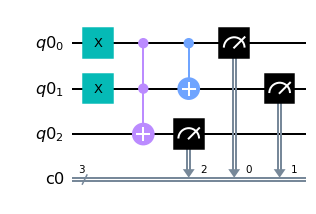

In [7]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[0])
circuit.x(qr[1])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuit.draw('mpl')

In [6]:
aerbackend = Aer.get_backend('aer_simulator')

In [8]:
transpiled_circuit = transpile(circuit, aerbackend)
qobj = assemble(transpiled_circuit,shots = 1024)
job = aerbackend.run(qobj)

/Volumes/Extreme SSD/AEROY4/Simulation-of-a-Quantum-Computer/qiskit-env/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


In [9]:
results = job.result()
counts = results.get_counts()
results.time_taken

0.00185394287109375

In [23]:
job.result().results[0].shots

1024

In [8]:
mapped_circuit = transpile(circuit, backend=lima_backend.backend)
qobj = assemble(mapped_circuit, backend=backend, shots=1024)
# job = backend.run(qobj)

In [20]:

job = lima_backend.backend.retrieve_job('6228f2e79e029ccded0deb65')
job.status()
job.done()
print(job.queue_position())

None


In [4]:
results = job.result()
counts = results.get_counts()
results.time_taken

NameError: name 'job' is not defined

job.re 

In [22]:
counts

{'000': 33,
 '001': 113,
 '010': 117,
 '011': 49,
 '100': 60,
 '101': 530,
 '110': 106,
 '111': 16}

In [13]:
f = repr(job)

In [19]:
job.job_id()

'6228f2e79e029ccded0deb65'

In [10]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

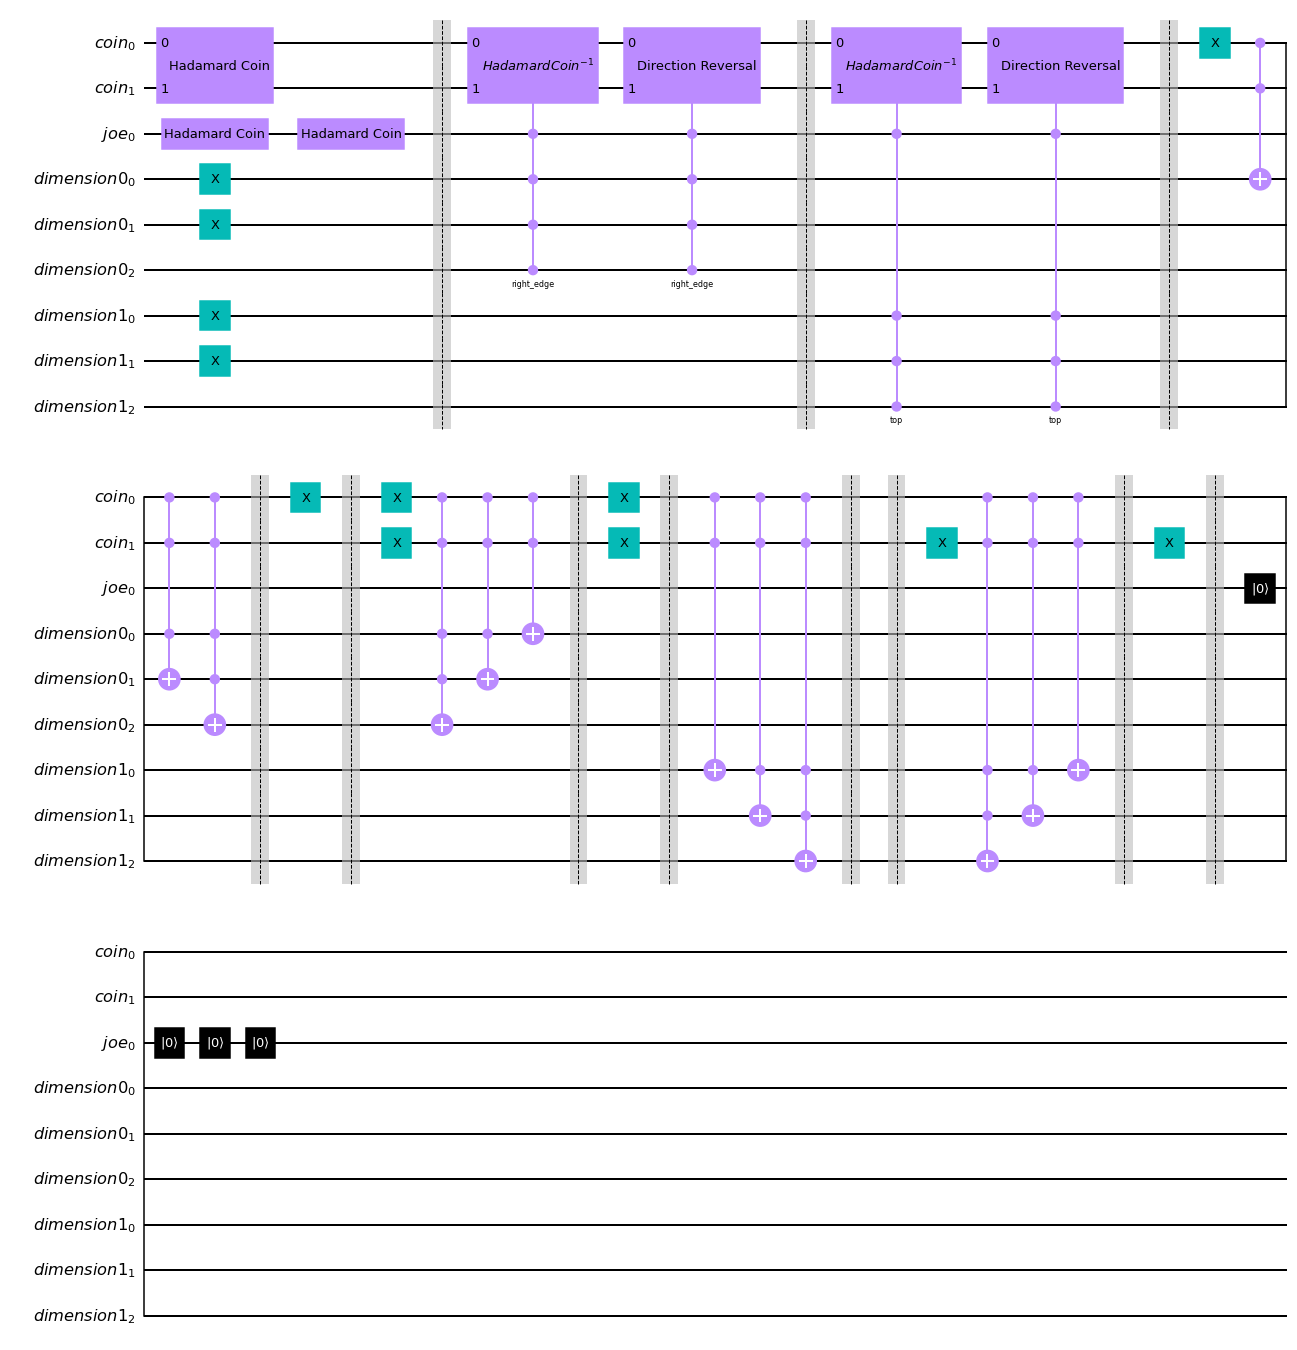

In [4]:
walk.quantum_circuit.draw('mpl')

In [4]:
from matplotlib import pyplot as plt

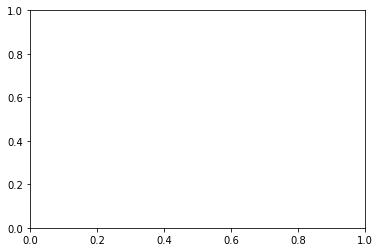

In [8]:
plt.cla()

In [3]:
my_list = {"j" : None}

print(my_list.get("j","k"))

None


In [46]:
import pandas as pd

shots = 2048
LPKPATH = '/Users/Ali/Downloads/7qubits2D_LeftPlusKickBack_2048shots_62gb-12-03-2022-15-31-42/Experiment_2_dims_7_qubits_Left_coin/data/2D_Walk_128_bit_Left Kickback Coin_60_steps_results.csv'
LMKPATH = '/Users/Ali/Downloads/7qubits2D_LeftMinusKickBack_2048shots_62gb-13-03-2022-08-39-33/Experiment_2_dims_7_qubits_Left_coin/data/2D_Walk_128_bit_Left Kickback Coin_60_steps_results.csv'
LKPATH = '/Users/Ali/Downloads/7qubits2D_LeftKickBack_2048shots_62gb-12-03-2022-10-14-38/Experiment_2_dims_7_qubits_Left_coin/data/2D_Walk_128_bit_Left Kickback Coin_60_steps_results.csv'
GPATH = '/Users/Ali/Downloads/7qubits2D_Grover-05-03-2022-11-48-35/Experiment_2_dims_7_qubits_Grover_coin/data/2D_Walk_128_bit_Grover Coin_60_steps_results.csv'
HPATH = '/Users/Ali/Downloads/7qubits2D_Hadamard_2048shots_62gb-12-03-2022-10-15-26/Experiment_2_dims_7_qubits_Hadamard_coin/data/2D_Walk_128_bit_Hadamard Coin_240_steps_results.csv'
df = pd.read_csv(HPATH)

d0 = list(df.dimension_0)
d1 = list(df.dimension_1)
pde = list(df.probability_density)

d0_new = []
d1_new = []


for idx, density in enumerate(pde):
    n_counts = int(density*shots)
    for _ in range(n_counts):
        d0_new.append(d0[idx])
        d1_new.append(d1[idx])

df_new = pd.DataFrame({"d0":d0_new,
                        "d1": d1_new})

df_new.head()
df_new.corr()





,d0,d1
d0,1.000000,0.346539
d1,0.346539,1.000000


In [51]:
from qiskit.test.mock import FakeToronto
from qiskit.providers.aer import AerSimulator
from qiskit import Aer
device_backend = FakeToronto()
sim_Toronto = AerSimulator.from_backend(device_backend)
assert type(sim_Toronto) == type(Aer.get_backend('aer_simulator'))

sim_Toronto

In [55]:

Aer.get_backend('aer_simulator').name()

'aer_simulator'